## K近邻(K-Nearest Neighbors)

### 介绍

- 使用距离预测样本最近的K个样本来蓝本来判断属于哪个分类的可能性最大

#### 数据准备

- 通过数据清洗，数据处理，将每条数据整理成向量

#### 计算距离

- 计算测试数据与训练数据之间的距离, 常见的距离有两种

- 曼哈顿距离 又称 马氏距离

$$d_{man}=\sum_{i=1}^{N}\left | X_{i}-Y_{i} \right |$$

- 其中x,y为两条数据, 对每一个维度进行汇总计算

- 欧式距离源自欧氏空间中两点之间的距离公式

$$ d_{euc}= \sqrt{\sum_{i=1}^{N}(X_{i}-Y_{i})^{2}}$$

#### 决策规则

- 找到与测试数据距离最近的 K 个训练数据样本, 根据决策规则，从 K 个邻居得到测试数据的类别

- 多数表决法
    - 多数表决法类似于投票的过程，也就是在 K 个邻居中选择类别最多的种类作为测试样本的类别。

- 加权表决法
    - 根据距离的远近，对近邻的投票进行加权，距离越近则权重越大，通过权重计算结果最大值的类为测试样本的类别。

### 代码

In [ ]:
import numpy as np


def create_data():
    features = np.array(
        [[2.88, 3.05],[3.1, 2.45],[3.05, 2.8],[2.9, 2.7],[2.75, 3.4],[3.23, 2.9],[3.2, 3.75],[3.5, 2.9],[3.65, 3.6],[3.35, 3.3],]
    )
    labels = ["A", "A", "A", "A", "A", "B", "B", "B", "B", "B"]
    return features, labels

features, labels = create_data()
print("features: \n", features)
print("labels: \n", labels)

features: 
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]
labels: 
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的x特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]

In [3]:
import operator


def majority_voting(class_count):
    # 多数表决函数
    sorted_class_count = sorted(
        class_count.items(), key=operator.itemgetter(1), reverse=True
    )
    return sorted_class_count


arr = {"A": 3, "B": 2, "C": 6, "D": 5}
majority_voting(arr)

def d_euc(x, y):
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

def knn_classify(test_data, train_data, labels, k):
    # KNN 方法完整实现
    distances = np.array([])  # 创建一个空的数组用于存放距离

    for each_data in train_data:  # 使用欧式距离计算数据相似度
        d = d_euc(test_data, each_data)
        distances = np.append(distances, d)

    sorted_distance_index = distances.argsort()  # 获取按距离从小到大排序后的索引
    sorted_distance = np.sort(distances)
    r = (sorted_distance[k] + sorted_distance[k - 1]) / 2  # 计算

    class_count = {}
    for i in range(k):  # 多数表决
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label, 0) + 1

    final_label = majority_voting(class_count)
    return final_label, r

test_data = np.array([3.18, 3.15])
final_label, r = knn_classify(test_data, features, labels, 5)
final_label

[('B', 3), ('A', 2)]

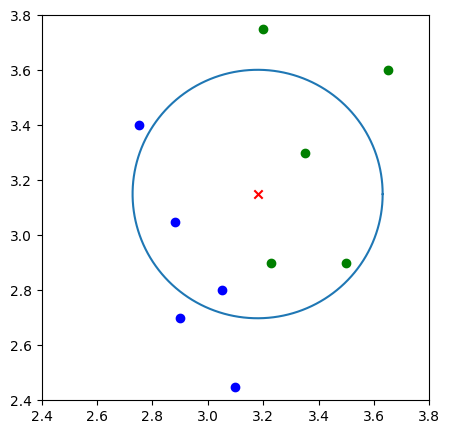

In [4]:
def circle(r, a, b):  # 为了画出圆，这里采用极坐标的方式对圆进行表示 ：x=r*cosθ，y=r*sinθ。
    theta = np.arange(0, 2 * np.pi, 0.01)
    x = a + r * np.cos(theta)
    y = b + r * np.sin(theta)
    return x, y

k_circle_x, k_circle_y = circle(r, 3.18, 3.15)

plt.figure(figsize=(5, 5))
plt.xlim((2.4, 3.8))
plt.ylim((2.4, 3.8))

x_feature = list(map(lambda x: x[0], features))  # 返回每个数据的 x 特征值
y_feature = list(map(lambda y: y[1], features))

plt.scatter(x_feature[:5], y_feature[:5], c="b")  # 在画布上绘画出"A"类标签的数据点
plt.scatter(x_feature[5:], y_feature[5:], c="g")
plt.scatter([3.18], [3.15], c="r", marker="x")  # 待测试点的坐标为 [3.1，3.2]
plt.plot(k_circle_x, k_circle_y)

#### scikit 实现

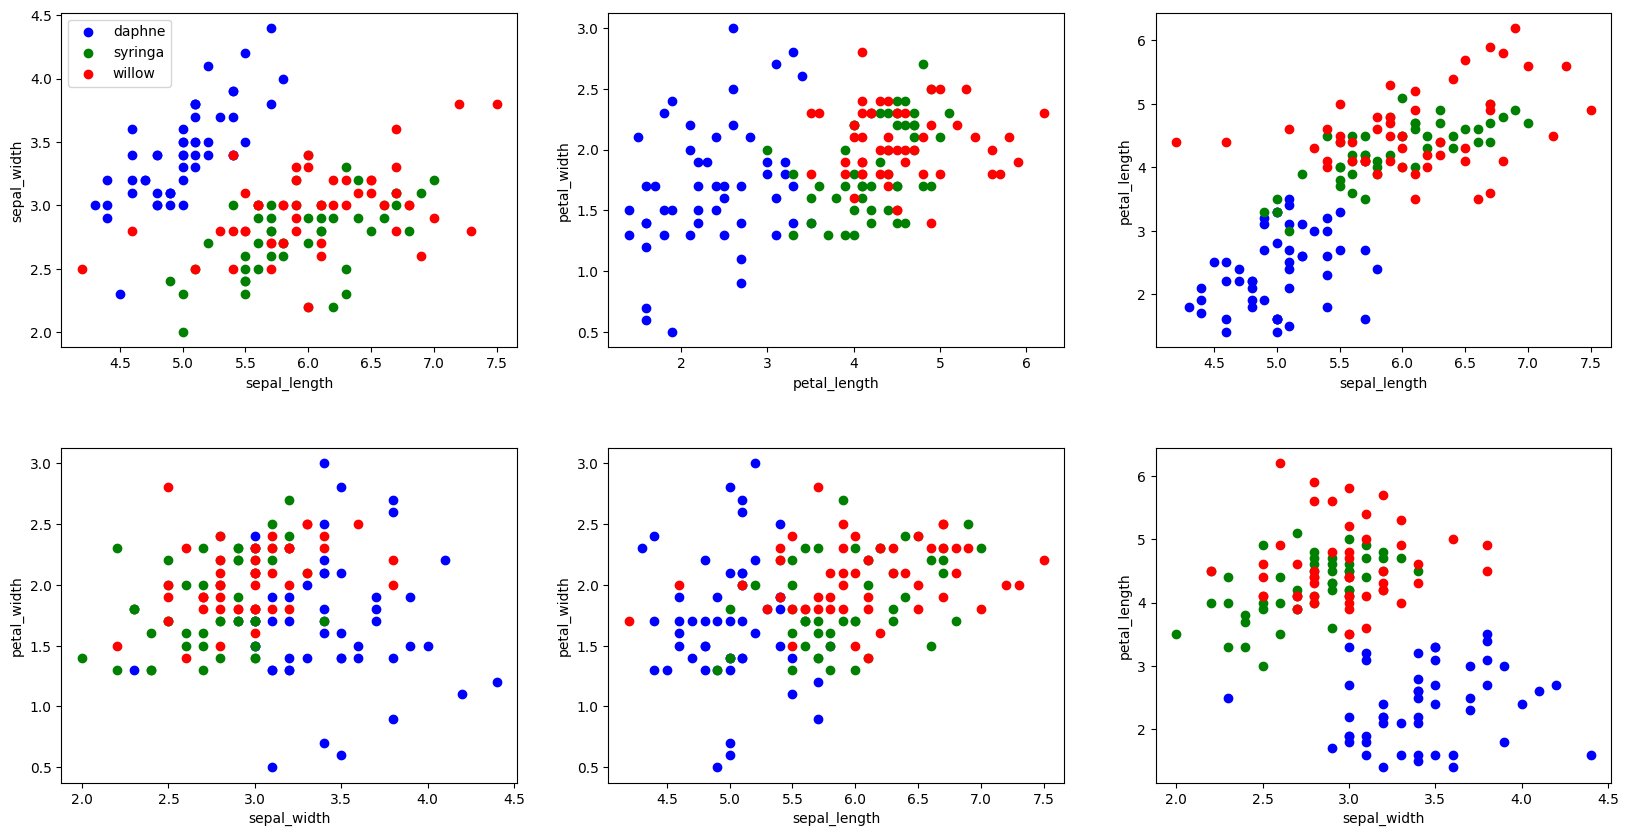

In [7]:
import pandas as pd

lilac_data = pd.read_csv("./course-9-syringa.csv")
"""绘制丁香花特征子图
"""
fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 构建生成 2*3 的画布，2 行 3 列
fig.subplots_adjust(hspace=0.3, wspace=0.2)  # 定义每个画布内的行间隔和高间隔

axes[0, 0].set_xlabel("sepal_length")  # 定义 x 轴坐标值
axes[0, 0].set_ylabel("sepal_width")  # 定义 y 轴坐标值
axes[0, 0].scatter(lilac_data.sepal_length[:50], lilac_data.sepal_width[:50], c="b")
axes[0, 0].scatter(
    lilac_data.sepal_length[50:100], lilac_data.sepal_width[50:100], c="g"
)
axes[0, 0].scatter(lilac_data.sepal_length[100:], lilac_data.sepal_width[100:], c="r")
axes[0, 0].legend(["daphne", "syringa", "willow"], loc=2)  # 定义示例

axes[0, 1].set_xlabel("petal_length")
axes[0, 1].set_ylabel("petal_width")
axes[0, 1].scatter(lilac_data.petal_length[:50], lilac_data.petal_width[:50], c="b")
axes[0, 1].scatter(
    lilac_data.petal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[0, 1].scatter(lilac_data.petal_length[100:], lilac_data.petal_width[100:], c="r")

axes[0, 2].set_xlabel("sepal_length")
axes[0, 2].set_ylabel("petal_length")
axes[0, 2].scatter(lilac_data.sepal_length[:50], lilac_data.petal_length[:50], c="b")
axes[0, 2].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[0, 2].scatter(lilac_data.sepal_length[100:], lilac_data.petal_length[100:], c="r")

axes[1, 0].set_xlabel("sepal_width")
axes[1, 0].set_ylabel("petal_width")
axes[1, 0].scatter(lilac_data.sepal_width[:50], lilac_data.petal_width[:50], c="b")
axes[1, 0].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 0].scatter(lilac_data.sepal_width[100:], lilac_data.petal_width[100:], c="r")

axes[1, 1].set_xlabel("sepal_length")
axes[1, 1].set_ylabel("petal_width")
axes[1, 1].scatter(lilac_data.sepal_length[:50], lilac_data.petal_width[:50], c="b")
axes[1, 1].scatter(
    lilac_data.sepal_length[50:100], lilac_data.petal_width[50:100], c="g"
)
axes[1, 1].scatter(lilac_data.sepal_length[100:], lilac_data.petal_width[100:], c="r")

axes[1, 2].set_xlabel("sepal_width")
axes[1, 2].set_ylabel("petal_length")
axes[1, 2].scatter(lilac_data.sepal_width[:50], lilac_data.petal_length[:50], c="b")
axes[1, 2].scatter(
    lilac_data.sepal_width[50:100], lilac_data.petal_length[50:100], c="g"
)
axes[1, 2].scatter(lilac_data.sepal_width[100:], lilac_data.petal_length[100:], c="r")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# 得到 lilac 数据集中 feature 的全部序列: sepal_length,sepal_width,petal_length,petal_width
feature_data = lilac_data.iloc[:, :-1]
label_data = lilac_data["labels"]  # 得到 lilac 数据集中 label 的序列

X_train, X_test, y_train, y_test = train_test_split(
    feature_data, label_data, test_size=0.3, random_state=2
)


def sklearn_classify(train_data, label_data, test_data, k_num):
    # 使用 sklearn 构建 KNN 预测模型
    knn = KNeighborsClassifier(n_neighbors=k_num)
    # 训练数据集
    knn.fit(train_data, label_data)
    # 预测
    predict_label = knn.predict(test_data)
    # 返回预测值
    return predict_label

# 使用测试数据进行预测
y_predict = sklearn_classify(X_train, y_train, X_test, 3)
y_predict


array(['daphne', 'daphne', 'willow ', 'daphne', 'daphne', 'willow ',
       'daphne', 'syringa', 'willow ', 'daphne', 'daphne', 'daphne',
       'daphne', 'daphne', 'syringa', 'syringa', 'syringa', 'willow ',
       'syringa', 'willow ', 'syringa', 'willow ', 'willow ', 'syringa',
       'syringa', 'daphne', 'daphne', 'willow ', 'daphne', 'willow ',
       'willow ', 'daphne', 'syringa', 'willow ', 'willow ', 'daphne',
       'willow ', 'willow ', 'syringa', 'willow ', 'willow ', 'willow ',
       'willow ', 'syringa', 'daphne'], dtype=object)

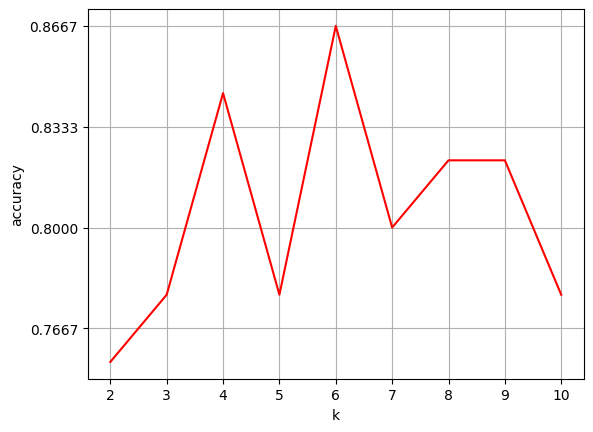

In [11]:

def get_accuracy(test_labels, pred_labels):
    # 准确率计算函数
    correct = np.sum(test_labels == pred_labels)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    accur = correct / n
    return accur

normal_accuracy = []  # 建立一个空的准确率列表
k_value = range(2, 11)
for k in k_value:
    y_predict = sklearn_classify(X_train, y_train, X_test, k)
    accuracy = get_accuracy(y_test, y_predict)
    normal_accuracy.append(accuracy)


plt.xlabel("k")
plt.ylabel("accuracy")
new_ticks = np.linspace(0.6, 0.9, 10)  # 设定 y 轴显示，从 0.6 到 0.9
plt.yticks(new_ticks)
plt.plot(k_value, normal_accuracy, c="r")
plt.grid(True)  # 给画布增加网格